In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import statsmodels.api as stat_mod
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Step 1: Reading and Understanding Data

In [4]:
df= pd.read_csv("./telecom_churn_data.csv")
print(df.shape)
df.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

### Preliminary Data Assesment
- ```mobile_number``` represent the unique_identifier which will not add any value in the data. Therefore, we wil drop it from the dataframe.
- ***circle_id*** is a dimension. Hence, the correct type of the column should be string/object. However, there is only one unique value in the column. Therefore, we will remove this column from the dataframe.
- Columns which are read as ```object``` should have been ***datetime***.
- Numeric columns which represent the number of std and local incoming and outgoing calls 
- There are columns with one unique value which may not add any value in the analysis. Hence, we will drop all these columns.
- There are columns with 2 unique values 

In [7]:
# Creating list of columns which are read as object instead of date

date_object= df.select_dtypes(include=np.object).columns.to_list()

for i in date_object:
    df[i]= pd.to_datetime(df[i])

df[date_object].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [8]:
# Creating list of columns having one unique value

col_wt_one_value = df.nunique().index[df.nunique()==1].to_list()


# List of columns having two unique values
# These columns explains whether a user use a particular service such as 'fb' and 'night_pck_user'

col_wt_two_value = df.nunique().index[df.nunique()==2].to_list()

In [9]:
# Drop the variables from DataFrame 'df' having one value excluding variable with datetime

df.drop(list(set(col_wt_one_value).difference(date_object)), axis=1, inplace=True)

# Drop unique_identifier "mobile_number"
df.drop('mobile_number', axis=1, inplace=True)

In [10]:
# Creating a list of nuemric columns
num_col= df.select_dtypes(include=np.number).columns.to_list()

# Step 2: Missing Value Identification and Imputation

#### Data Summary:
- We have identified two type of variables in the data broadly (datetime, numeric).
- Among numeric variables, there are variables to identify whether a user use a particular service or not. Ideally, they should be treated as an object. However, we will not change its data type as it is already given as 1/0.
- The treatment of missing value in data is subject to the data type.
- Next step is to first identify whether there are missing values in the data or not. And Should we really impute them or delete the entire column itself.

In [11]:
100*(df.isnull().sum()/len(df))

last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_m

#### Observations:
- ***dat_of_last_recharge*** columns consists of missing values whereas ```total_rech_amt and total_rech_num``` do not have missing values. This situation requires further investigation.
- We will sum the values in ```total_rech_amt``` for all the records where ```dat_of_last_recharge``` is missing. If the value turn out to be **'0'** then we need not to impute missing value.
- Otherwise, we will have to look into other related features to establish the fact that recharge amount is correct.
- In case other related features came out to be missing then we will replace any value greater than 0 in ```total_rech_amt``` with '0'. 

In [12]:
# Investigating total_rech_amt and dat_of_last_recharge

# (1) for month_6
print('Recharge amount in month_6 when date is missing: ',df.loc[df['date_of_last_rech_6'].isnull(),'total_rech_amt_6'].sum())

# (2) for month_7
print('Recharge amount in month_7 when date is missing: ',df.loc[df['date_of_last_rech_7'].isnull(),'total_rech_amt_7'].sum())

# (3) for month_8
print('Recharge amount in month_8 when date is missing: ',df.loc[df['date_of_last_rech_8'].isnull(),'total_rech_amt_8'].sum())

# (4) for month_9
print('Recharge amount in month_9 when date is missing: ',df.loc[df['date_of_last_rech_9'].isnull(),'total_rech_amt_9'].sum())

Recharge amount in month_6 when date is missing:  0
Recharge amount in month_7 when date is missing:  0
Recharge amount in month_8 when date is missing:  0
Recharge amount in month_9 when date is missing:  0


##### Data Investigation Result:
- As we can see, the value of recharge is zero for records where date is missing
- The suggested action in this situation is to drop rows where date is missing. However, dropping the rows may not help as the number of missing values in all the four months is different. For instance -  if we drop rows based on the number of missing records in month_9, which is approx 4.8%, then we will end up losing information in the previous months due to the possibility thay user might have recharge done in months prior to month_9
- ***Hence, We will drop the date columns.***

In [13]:
print('Number of columns before dropping date columns: ', df.shape[1])
df.drop(date_object, axis=1, inplace=True)
print('Number of columns after dropping date columns: ', df.shape[1])

Number of columns before dropping date columns:  213
Number of columns after dropping date columns:  201


#### Let us understand the missing value pattern in ```Numeric Columns```
- As a first step, we will identify the columns which has missing values.

In [14]:
# Creating a list of numeric columns having missing values
num_missing_col= df[num_col].isnull().sum().index[df[num_col].isnull().sum()>0].to_list()

In [15]:
df[num_missing_col].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000

#### Observations: Missing Value
- Numeric missing columns in the data are about the customer usage, revenue and identifying whether a customer is using some night pack or is a fb user or not.
- **'0'** in these columns represent that customer hasn't availed any service on network.
- And occurence of missing values in this scenerio indicates customer behaviour that they might not have its number recharged for the months'.
- Hence, we will be imputing missing values with **'0'**.

In [16]:
df[num_missing_col]=df[num_missing_col].fillna(0)

In [17]:
100*(df[num_missing_col].isnull().sum()/len(df))

onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
loc_og_mou_9          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_m

# Step 3: Labeling  Customers Churn/Non-Churn
#### As per the problem statement, we need to tag customers based on usage. Therefore, we will be using the following columns.
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [18]:
# Initially set all the values as 0
df['churn']= 0

#is_churned boolean flag for customers where above values are zero
is_churned = (df.total_ic_mou_9 == 0) & \
             (df.total_og_mou_9 == 0) & \
             (df.vol_2g_mb_9 ==0) & \
             (df.vol_3g_mb_9 ==0)

# set all which having is_churned True condition as 1
df.loc[is_churned,'churn']=1
df['churn'].value_counts()/len(df)

0    0.898089
1    0.101911
Name: churn, dtype: float64

##### We wil now drop all the attributes from DataFrame for the 9th Month

In [19]:
month_9_col= df.columns[df.columns.str.contains("_9")].to_list()
month_9_col.append('sep_vbc_3g')
df.drop(month_9_col, axis=1, inplace=True)
df.shape

(99999, 152)

# Step 3: High Value Customer Identification
#### Since data is provided for the four consequtive months starts from June, therefore we will look into the recharge amount in ```June and July``` and create a subset of customers whose average spend is more than the 70th percentile ```(Benchmark given in the problem statement).```

**Steps**
- Find the columns which represent the recharge amount for both data and calling.
- Calculate the average of total recharge in June and July.
- Select customers whose recharge amount is greater than or equal to **70th percentile** of average recharge amount.

**Addition Check - Outlier Identification & Treatment**
- After calculating the average recharge, we will see if there are customers whose spend is way higher than majority of the customers.

In [20]:
# Calculating Average recharge amount in June and July

df['_dataSpend_6'] = (df['total_rech_data_6'] * df['av_rech_amt_data_6']) # represent the total data spend in June
df['_dataSpend_7'] = (df['total_rech_data_7'] * df['av_rech_amt_data_7']) # represent the total data spend in July
df['_dataSpend_8'] = (df['total_rech_data_8'] * df['av_rech_amt_data_8']) # represent the total data spend in August

# represent the average spend in June & July including data and call
df['avg_spend_6_7'] = (df['_dataSpend_6'] + df['_dataSpend_7'] + df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2 

# represent the total spend in August including data and call
df['total_rech_amt_data_call_8'] = df['total_rech_amt_8'] + df['_dataSpend_8']

In [21]:
# Checking 70th percentile of Average Recharge Amount
print("70th percentile of Average Recharge Amount: ", df['avg_spend_6_7'].quantile(0.7))

# Number of users whose spend is above 70th percentile.
print("Number of users whose spend is above 70th percentile: ",len(df[df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.7)]))


70th percentile of Average Recharge Amount:  478.0
Number of users whose spend is above 70th percentile:  30001


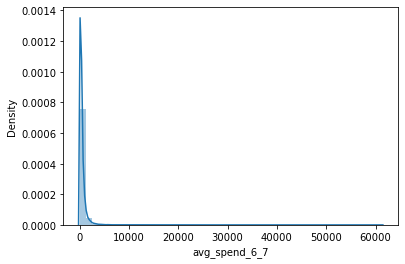

In [22]:
sns.distplot(df['avg_spend_6_7'])
plt.show()

#### Observations: Average Recharge
- As we can see, the distribution plot of average spend is highly right skewed which indicates presence of outliers.
- We will see if we can treat the outliers as such that it does not impact analysis.

Q3:  553.0
Q1:  128.0
IQR:  425.0
outlier:  1190.5


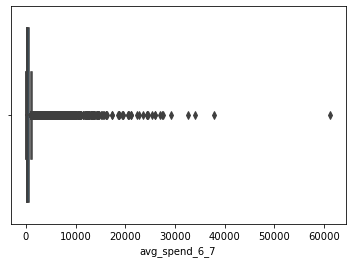

In [23]:
Q3= df['avg_spend_6_7'].quantile(0.75)
print("Q3: ", Q3)
Q1= df['avg_spend_6_7'].quantile(0.25)
print("Q1: ", Q1)
IQR= Q3 - Q1
print("IQR: ", IQR)
outlier = Q3+1.5*IQR
print("outlier: ", outlier)
sns.boxplot(df[df['avg_spend_6_7']<outlier].avg_spend_6_7)
sns.boxplot(df['avg_spend_6_7'])
plt.show()

In [24]:
df['avg_spend_6_7'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99,.995,.997,.999])

0.100       60.000
0.200      108.500
0.300      155.000
0.400      209.500
0.500      275.000
0.600      360.000
0.700      478.000
0.800      656.500
0.900     1028.000
0.950     1512.000
0.970     1991.500
0.990     3363.510
0.995     4696.520
0.997     6090.593
0.999    10415.707
Name: avg_spend_6_7, dtype: float64

In [25]:
# Number of users whose spend is above 99.9th percentile.
print("Number of users whose spend is above 99.9th percentile: ",
      len(df[df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.999)])
     )

Number of users whose spend is above 99.9th percentile:  100


In [26]:
# Checking the percentage of churn in customers whose spend is more than 99.9th percentile
print("Churn % for customers whose spend is more than 99.9th percentile: ", 100*(df.loc[df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.999)].churn.sum()/len(df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.999))))

# Print the list of customers identified as very high value customers in previous step
df.loc[df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.999),
       ['_dataSpend_6', 'total_rech_amt_6','_dataSpend_7', 'total_rech_amt_7','churn']
      ]

Churn % for customers whose spend is more than 99.9th percentile:  0.006000060000600006


,_dataSpend_6,total_rech_amt_6,_dataSpend_7,total_rech_amt_7,churn
33,5285.0,1058,20424.00,2806,0
1644,20706.0,474,20286.00,886,0
2987,1414.0,2339,15190.00,4140,0
5732,12348.0,2441,4753.00,2057,0
6100,7544.0,1002,17505.00,1185,0
6175,11592.0,632,11840.00,705,0
7032,20368.0,1298,3376.00,487,0
7382,14094.0,1841,11143.50,1867,0
9552,15200.0,810,5472.00,456,0
9598,20634.0,1136,9425.00,1540,0


#### Observation:
- Interesting pattern has been observed that majority of the customers spend more on data.
- Customer who spent spent extremely high on calls could be ISD users like a customer with index ```38610```. 

In [27]:
df.iloc[33019,:]

arpu_6                        10955.066
arpu_7                         8609.460
arpu_8                        13505.996
onnet_mou_6                       0.000
onnet_mou_7                       0.000
onnet_mou_8                       0.000
offnet_mou_6                    177.530
offnet_mou_7                     58.440
offnet_mou_8                    107.030
roam_ic_mou_6                     0.000
roam_ic_mou_7                     0.000
roam_ic_mou_8                     0.000
roam_og_mou_6                     0.000
roam_og_mou_7                     0.000
roam_og_mou_8                     0.000
loc_og_t2t_mou_6                  0.000
loc_og_t2t_mou_7                  0.000
loc_og_t2t_mou_8                  0.000
loc_og_t2m_mou_6                159.730
loc_og_t2m_mou_7                 53.860
loc_og_t2m_mou_8                 47.080
loc_og_t2f_mou_6                  0.000
loc_og_t2f_mou_7                  0.310
loc_og_t2f_mou_8                  0.000
loc_og_t2c_mou_6                  0.000


In [28]:
# Creating a subset of including very high value customers based on the given 
# threshold i.e. 70th percentile of average spend in month 6 & 7
df_v_high= df[df['avg_spend_6_7']>=df['avg_spend_6_7'].quantile(0.7)]
df_v_high.shape

(30001, 157)

In [29]:
# Creating a subset of excluding very high value customers based on the given 
# threshold i.e. 70th percentile of average spend in month 6 & 7
df_high= df[df['avg_spend_6_7']<df['avg_spend_6_7'].quantile(0.999)]
df_high= df_high[df_high['avg_spend_6_7']>=df_high['avg_spend_6_7'].quantile(0.7)]
df_high.shape

(29987, 157)

- We will proceed with the subset which include customers with very high spend
#### df_v_high

In [30]:
# Updating the list of nuemric columns
num_col= df_v_high.select_dtypes(include=np.number).columns.to_list()
print("Number of numeric columns: ", len(num_col))

# Updating the list of columns having two unique values
# These columns explains whether a user use a particular service such as 'fb' and 'night_pck_user'
col_wt_two_value = df_v_high.nunique().index[df_v_high.nunique()==2].to_list()
print("Number of columns with two unique values: ", len(col_wt_two_value))

Number of numeric columns:  157
Number of columns with two unique values:  7


# Step 4: Derive Features
- Taking difference of average of month_6 and month_7 for all the features from the same feature in month_8
- Excluding the list of features which have only two unique values such as ```(fub_user,night_pck_user)```. 

In [31]:
def getDiffColumn(var):
    df_v_high["Diff_"+str(var)]=df_v_high[var+"_8"] - ((df_v_high[var+"_6"] + df_v_high[var+"_7"] )/2 )
    df_v_high.drop([var+"_8",var+"_6",var+"_7"],axis=1,inplace=True)

In [32]:
var_list=[]
for var in df.columns:
    if str(var)[-2]=="_":
        var_list.append(str(var)[:-2])
var_list= list(set(var_list))
print(len(var_list))
var_list

52


['total_og_mou',
 'last_day_rch_amt',
 '_dataSpend',
 'roam_og_mou',
 'loc_og_mou',
 'max_rech_amt',
 'arpu',
 'loc_og_t2f_mou',
 'total_rech_num',
 'loc_ic_mou',
 'loc_ic_t2t_mou',
 'night_pck_user',
 'onnet_mou',
 'std_ic_t2m_mou',
 'av_rech_amt_data',
 'loc_og_t2c_mou',
 'isd_ic_mou',
 'monthly_3g',
 'count_rech_2g',
 'ic_others',
 'offnet_mou',
 'fb_user',
 'std_og_t2m_mou',
 'sachet_2g',
 'total_ic_mou',
 'sachet_3g',
 'avg_spend_6',
 'std_og_t2f_mou',
 'spl_ic_mou',
 'max_rech_data',
 'isd_og_mou',
 'monthly_2g',
 'total_rech_amt_data_call',
 'loc_ic_t2m_mou',
 'loc_og_t2t_mou',
 'vol_2g_mb',
 'arpu_2g',
 'vol_3g_mb',
 'std_ic_t2t_mou',
 'total_rech_amt',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'arpu_3g',
 'count_rech_3g',
 'loc_ic_t2f_mou',
 'std_og_t2t_mou',
 'roam_ic_mou',
 'total_rech_data',
 'std_og_mou',
 'loc_og_t2m_mou',
 'spl_og_mou',
 'og_others']

In [33]:
non_itr_list=['avg_spend_6','total_rech_amt_data_call']
for var in var_list:
    if var not in non_itr_list:
        getDiffColumn(str(var))

print(df_v_high.shape)
df_v_high.head()

(30001, 57)


,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,avg_spend_6_7,total_rech_amt_data_call_8,Diff_total_og_mou,Diff_last_day_rch_amt,Diff__dataSpend,Diff_roam_og_mou,Diff_loc_og_mou,Diff_max_rech_amt,Diff_arpu,Diff_loc_og_t2f_mou,Diff_total_rech_num,Diff_loc_ic_mou,Diff_loc_ic_t2t_mou,Diff_night_pck_user,Diff_onnet_mou,Diff_std_ic_t2m_mou,Diff_av_rech_amt_data,Diff_loc_og_t2c_mou,Diff_isd_ic_mou,Diff_monthly_3g,Diff_count_rech_2g,Diff_ic_others,Diff_offnet_mou,Diff_fb_user,Diff_std_og_t2m_mou,Diff_sachet_2g,Diff_total_ic_mou,Diff_sachet_3g,Diff_std_og_t2f_mou,Diff_spl_ic_mou,Diff_max_rech_data,Diff_isd_og_mou,Diff_monthly_2g,Diff_loc_ic_t2m_mou,Diff_loc_og_t2t_mou,Diff_vol_2g_mb,Diff_arpu_2g,Diff_vol_3g_mb,Diff_std_ic_t2t_mou,Diff_total_rech_amt,Diff_std_ic_mou,Diff_std_ic_t2f_mou,Diff_arpu_3g,Diff_count_rech_3g,Diff_loc_ic_t2f_mou,Diff_std_og_t2t_mou,Diff_roam_ic_mou,Diff_total_rech_data,Diff_std_og_mou,Diff_loc_og_t2m_mou,Diff_spl_og_mou,Diff_og_others
0,968,30.40,0.00,101.20,1,559.0,504.0,0.000,0.0,0.0,0.000,0.000,0.0,7.7025,0.000,-1.5,5.440,0.160,0.0,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,5.440,0.0,0.00,0.000,0.0,0.000,0.0,4.130,0.000,-9.975,0.00,-7.555,0.000,-55.0,0.000,0.000,0.000,0.0,1.150,0.000,0.00,0.0,0.000,0.000,0.00,0.0
7,802,57.74,19.38,18.74,1,1185.0,3638.0,-198.225,779.0,0.0,19.895,-222.245,395.0,1961.9650,-5.405,2.0,-203.515,-17.890,0.0,-3.97,32.115,0.0,0.00,23.295,0.0,0.0,-0.325,-184.385,0.0,8.315,0.0,-163.510,0.0,3.31,-0.105,0.0,9.920,0.0,-98.335,-1.105,0.000,0.00,0.000,6.030,2453.0,17.130,-21.005,0.000,0.0,-87.280,-1.785,6.78,0.0,9.840,-215.725,4.25,0.0
8,315,21.03,910.65,122.16,0,696.0,327.0,-298.450,-15.0,30.0,0.000,-270.095,-92.0,-298.1100,0.000,-6.0,-36.840,-16.530,0.0,-347.28,-12.605,-19.5,7.15,0.000,0.0,2.0,0.000,48.835,0.5,63.825,2.5,-49.635,0.0,0.00,0.000,-54.0,0.000,-0.5,-20.300,-244.870,-177.970,0.00,-363.535,-0.190,-399.0,-12.795,0.000,19.830,0.0,0.000,-102.415,0.00,2.0,-38.590,-25.230,10.23,0.0
21,720,0.00,0.00,0.00,0,640.0,718.0,123.975,25.0,0.0,0.000,34.175,0.0,81.6570,1.205,3.0,52.605,13.205,0.0,-32.12,48.780,0.0,0.00,0.000,0.0,0.0,0.000,156.085,0.0,139.940,0.0,91.550,0.0,0.00,0.000,0.0,0.000,0.0,32.730,18.020,0.000,0.00,0.000,-9.840,78.0,38.945,0.000,0.000,0.0,6.665,-50.145,0.00,0.0,89.800,14.940,0.00,0.0
23,604,40.45,51.86,0.00,0,583.0,979.0,102.270,-89.5,184.0,0.000,49.345,89.5,232.8425,0.000,0.0,78.690,35.765,0.0,-16.23,35.250,92.0,17.71,-10.375,0.0,0.0,10.385,118.505,0.5,35.255,0.0,127.095,1.0,0.00,0.000,89.5,-0.005,0.0,42.205,-16.230,-0.230,-0.22,710.375,13.125,212.0,48.375,0.000,43.985,1.0,0.710,0.000,0.00,1.0,35.255,65.585,17.66,0.0


In [34]:
# creating difference columns seperatly for total spend and vbc_3g based on the logic applied in previous step
# because these columns were excluded from loop as their nomenclature is not aligned with rest of the variables in DataFrame

df_v_high['Diff_vbc_3g']= df_v_high['aug_vbc_3g'] - ((df_v_high['jun_vbc_3g'] + df_v_high['jul_vbc_3g'])/2)
df_v_high['Diff_total_rech_amt_data_call'] = df_v_high['total_rech_amt_data_call_8'] - df_v_high['avg_spend_6_7']
df_v_high.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','total_rech_amt_data_call_8','avg_spend_6_7'], axis=1, inplace=True)
df_v_high.shape

(30001, 54)

In [35]:
df_v_high['Diff_night_pck_user'].unique()

array([ 0. , -1. ,  1. , -0.5,  0.5])

In [36]:
df_v_high['Diff_fb_user'].unique()

array([ 0. ,  0.5, -0.5, -1. ,  1. ])

In [37]:
# Updating the list of nuemric columns
num_col= df_v_high.select_dtypes(include=np.number).columns.to_list()
num_col.remove('churn')
print("Number of numeric columns excluding churn (res_var): ", len(num_col))

Number of numeric columns excluding churn (res_var):  53


# Step 5: Feature Understanding and Visualization
### I. Data Distribution

In [38]:
import math
def distribution(dataframe,numeric_var_list):
    row_num= math.ceil(len(numeric_var_list)/2)
    for i,val in enumerate(numeric_var_list, start=1):
        plt.subplot(row_num,2,i)
        sns.distplot(dataframe[val])

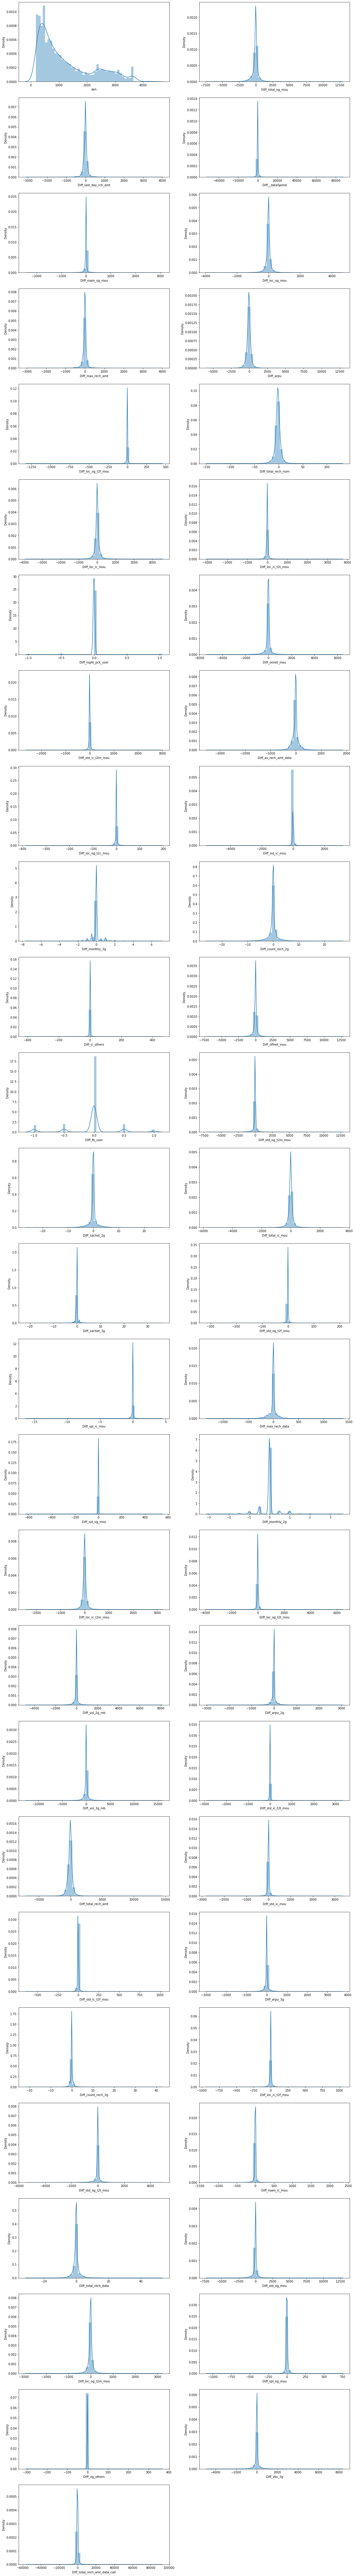

In [39]:
# This function may take 2-3 minutes to run distribution on each variable in 'df_v_high' except churn

plt.figure(figsize=[20,len(num_col)*3])
distribution(df_v_high,num_col)
plt.show()

In [40]:
df_v_high[num_col].describe()

,aon,Diff_total_og_mou,Diff_last_day_rch_amt,Diff__dataSpend,Diff_roam_og_mou,Diff_loc_og_mou,Diff_max_rech_amt,Diff_arpu,Diff_loc_og_t2f_mou,Diff_total_rech_num,Diff_loc_ic_mou,Diff_loc_ic_t2t_mou,Diff_night_pck_user,Diff_onnet_mou,Diff_std_ic_t2m_mou,Diff_av_rech_amt_data,Diff_loc_og_t2c_mou,Diff_isd_ic_mou,Diff_monthly_3g,Diff_count_rech_2g,Diff_ic_others,Diff_offnet_mou,Diff_fb_user,Diff_std_og_t2m_mou,Diff_sachet_2g,Diff_total_ic_mou,Diff_sachet_3g,Diff_std_og_t2f_mou,Diff_spl_ic_mou,Diff_max_rech_data,Diff_isd_og_mou,Diff_monthly_2g,Diff_loc_ic_t2m_mou,Diff_loc_og_t2t_mou,Diff_vol_2g_mb,Diff_arpu_2g,Diff_vol_3g_mb,Diff_std_ic_t2t_mou,Diff_total_rech_amt,Diff_std_ic_mou,Diff_std_ic_t2f_mou,Diff_arpu_3g,Diff_count_rech_3g,Diff_loc_ic_t2f_mou,Diff_std_og_t2t_mou,Diff_roam_ic_mou,Diff_total_rech_data,Diff_std_og_mou,Diff_loc_og_t2m_mou,Diff_spl_og_mou,Diff_og_others,Diff_vbc_3g,Diff_total_rech_amt_data_call
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1209.368754,-67.437337,-8.231159,-28.752505,-3.496201,-18.870166,-10.598813,-51.038557,-0.497514,-1.812056,-9.465915,-3.425675,-0.001667,-30.193620,-2.086269,-13.085795,-0.024744,-0.331985,-0.012366,-0.110430,-0.102438,-40.821520,-0.043682,-26.327010,-0.085180,-13.430810,-0.016049,-0.230066,-0.013833,-6.467768,-0.189665,-0.025249,-4.786070,-7.002408,-19.896683,-5.675100,-5.733637,-1.244436,-76.249725,-3.516120,-0.185179,-5.041000,-0.028416,-1.253842,-21.618459,-1.875878,-0.138845,-48.175917,-11.369818,0.093746,-0.294391,0.440497,-105.002230
std,957.677989,502.630069,145.251806,1416.997573,94.165541,213.766985,136.893018,334.872321,14.046863,6.755899,180.801296,102.050822,0.096681,308.732579,74.416033,148.249896,6.974352,56.736330,0.474128,1.878156,9.582714,349.434892,0.361410,303.760044,1.867673,221.899902,0.871149,7.536745,0.174520,78.343307,14.001271,0.353771,134.931249,138.240028,256.114926,116.362092,624.877555,58.644175,418.479122,98.256037,13.707181,130.961477,0.992313,29.499749,273.056056,65.972062,2.214561,427.952693,148.307664,18.088160,3.318381,316.100543,1560.213721
min,180.000000,-7213.410000,-3065.000000,-52407.500000,-2410.835000,-3867.830000,-3010.000000,-5811.052500,-1319.850000,-147.500000,-3841.055000,-3021.870000,-1.000000,-5295.315000,-2624.905000,-3486.500000,-384.385000,-5534.595000,-7.500000,-25.500000,-408.240000,-7094.390000,-1.000000,-7037.535000,-26.000000,-5710.150000,-21.500000,-314.280000,-16.280000,-1303.000000,-619.650000,-3.000000,-2387.110000,-3875.375000,-4740.925000,-2980.040000,-12385.505000,-2897.680000,-6950.000000,-2777.350000,-636.500000,-2944.290000,-21.500000,-928.210000,-5391.210000,-1296.985000,-30.500000,-7127.425000,-2863.535000,-1081.910000,-304.905000,-4808.360000,-56227.000000
25%,460.000000,-168.025000,-52.000000,-205.000000,0.000000,-58.880000,-33.000000,-180.179500,-1.210000,-4.000000,-49.805000,-15.170000,0.000000,-52.345000,-7.410000,-59.000000,-0.365000,0.000000,0.000000,-0.500000,-0.025000,-100.900000,0.000000,-25.980000,0.000000,-67.230000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,-34.405000,-16.615000,-21.120000,-10.545000,-2.270000,-2.830000,-245.000000,-11.905000,-0.115000,-4.080000,0.000000,-2.995000,-12.160000,0.000000,-0.500000,-54.595000,-38.820000,-2.750000,0.000000,0.000000,-500.000000
50%,846.000000,-14.625000,0.000000,0.000000,0.000000,-4.955000,0.000000,

#### Observations: Data Distribution
- The new features depict two pattern in the data:
    - Independent Features are skewed.
    - most of the features have median either close to 0 or 0.
    - Since features are skewed, therefores mean values are affected.

- irrespective of features being skewed, we won't transofrm the skewed features to normal distribution as there is no assumption in linear model that independent feature has to be Normally distributed.
- Tree models are robust enough to handle skewness in data.

# Step 6: Splitting Data into Training and Testing Dataset

In [41]:
data = df_v_high.copy()

In [42]:
def split_date(df):
    Y = df["churn"]
    X = df.drop(["churn"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    print("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    #plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca
    
    
def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    print("Shape of train datatset before : ",str(x_train.shape))
    print("Percenatge of Churned customer data : ",str(round(100*Y.sum()/len(Y),2)))
    print("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE(random_state=42)
    x_tr,y_tr = smote.fit_resample(x_train,y_train)
    print("Shape of train datatset after SMOTE : ",str(x_tr.shape))

    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    print("Shape of train datatset after PCA : ",str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test

#### I. Create subset for Independent and Response Variable

In [43]:
X,Y=split_date(data)

#### II. Imbalance Data Treatment

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
print("Shape before Imblance data treatment: ", X.shape)
print("Shape after Imblance data treatment: ", X_res.shape)

Shape before Imblance data treatment:  (30001, 53)
Shape after Imblance data treatment:  (55120, 53)


#### III. Splitting data into train and test

In [45]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, test_size = 0.3, random_state = 100)
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (38584, 53)
Shape of y_train:  (38584,)
Shape of x_test:  (16536, 53)
Shape of y_test:  (16536,)


#### IV. Scaling data

In [46]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=num_col)
print(X_train_scaled.shape)
X_train_scaled.head()

(38584, 53)


,aon,Diff_total_og_mou,Diff_last_day_rch_amt,Diff__dataSpend,Diff_roam_og_mou,Diff_loc_og_mou,Diff_max_rech_amt,Diff_arpu,Diff_loc_og_t2f_mou,Diff_total_rech_num,Diff_loc_ic_mou,Diff_loc_ic_t2t_mou,Diff_night_pck_user,Diff_onnet_mou,Diff_std_ic_t2m_mou,Diff_av_rech_amt_data,Diff_loc_og_t2c_mou,Diff_isd_ic_mou,Diff_monthly_3g,Diff_count_rech_2g,Diff_ic_others,Diff_offnet_mou,Diff_fb_user,Diff_std_og_t2m_mou,Diff_sachet_2g,Diff_total_ic_mou,Diff_sachet_3g,Diff_std_og_t2f_mou,Diff_spl_ic_mou,Diff_max_rech_data,Diff_isd_og_mou,Diff_monthly_2g,Diff_loc_ic_t2m_mou,Diff_loc_og_t2t_mou,Diff_vol_2g_mb,Diff_arpu_2g,Diff_vol_3g_mb,Diff_std_ic_t2t_mou,Diff_total_rech_amt,Diff_std_ic_mou,Diff_std_ic_t2f_mou,Diff_arpu_3g,Diff_count_rech_3g,Diff_loc_ic_t2f_mou,Diff_std_og_t2t_mou,Diff_roam_ic_mou,Diff_total_rech_data,Diff_std_og_mou,Diff_loc_og_t2m_mou,Diff_spl_og_mou,Diff_og_others,Diff_vbc_3g,Diff_total_rech_amt_data_call
0,1.844980,0.014464,-2.590734,0.139025,0.051647,-0.868427,1.345529,0.778139,-0.234419,0.370450,-0.857704,-0.179312,0.052044,0.141621,0.017178,0.431757,0.071328,0.358470,0.128736,0.741375,-0.095779,-0.093501,0.358234,0.173857,0.726447,-0.603560,0.104657,0.067796,0.186007,0.564308,0.065543,0.125437,-1.084674,-0.574611,0.187152,0.175877,0.123504,0.188303,0.315289,0.103845,-0.209540,0.157464,0.150245,0.071312,0.355930,0.029442,0.686757,0.348094,-0.726589,0.119763,0.135604,0.100015,0.230833
1,-0.718273,-0.387755,-0.270869,-0.167109,0.051236,0.253976,0.631811,-0.179517,-0.039186,-0.112495,0.239370,0.140027,0.052044,0.194850,-0.949373,-0.207722,-0.649260,-0.429151,0.128736,-0.600242,-1.698971,-0.720752,-0.584558,-0.852777,-0.623213,-0.200681,-0.680966,0.067796,0.186007,-0.008492,0.065543,0.125437,0.221753,0.188240,-0.292706,-0.179058,0.123504,0.085503,-0.134821,-0.639941,-0.150922,0.042695,-0.537370,0.095136,0.132514,0.048799,-0.726327,-0.508778,0.205876,-1.039450,0.078886,0.100015,-0.193990
2,-0.891359,0.100999,-0.042774,0.118829,-0.174167,-0.935823,-0.651100,-0.459011,0.497060,-0.007098,-0.611584,-0.148318,0.052044,0.295106,-0.097995,0.257133,0.071328,-10.153680,0.128736,0.220554,0.033606,-0.156370,0.358234,0.285417,0.202504,-2.111694,0.104657,7.735006,0.186007,0.246684,0.046176,0.125437,-0.816460,0.105159,0.136723,-0.227432,0.097376,0.470382,-0.353921,1.083149,7.484290,-0.092911,0.150245,0.362454,0.286566,-1.062753,0.247544,0.471356,-1.470374,0.159624,0.135604,0.028527,-0.015830
3,-0.168273,0.436932,0.154979,-2.221458,0.051647,0.253315,0.503201,0.905784,0.071892,0.118751,0.195623,0.147231,0.052044,0.305076,0.124753,-1.031589,-0.149142,0.063537,0.128736,0.220554,0.033606,0.376794,0.358234,0.318920,0.202504,0.258670,-5.407666,0.067796,0.186007,0.246684,0.065543,0.125437,0.147900,0.154711,0.029383,-1.686638,-0.958785,0.180661,0.815105,0.205460,0.048903,0.030377,-4.674407,0.140641,0.267216,0.029442,-1.728914,0.392744,0.222541,0.089076,-0.800043,0.100015,-1.687415
4,-0.098811,0.214632,-0.232920,0.118829,0.051647,-0.015689,0.430407,0.296846,0.234216,0.873849,0.057875,0.018295,0.052044,0.064905,0.013227,0.257133,0.071328,-0.245145,0.128736,0.220554,0.033606,0.264038,0.358234,0.205690,0.202504,0.025458,0.104657,-0.000799,0.186007,0.246684,0.065543,0.125437,0.048035,-0.207890,0.187152,0.175877,0.123504,0.083062,0.263007,0.063059,0.022684,0.157464,0.150245,0.110618,0.138922,0.029442,0.247544,0.231501,0.131295,0.552861,-0.317320,0.100015,0.195085


In [47]:
X_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=num_col)
print(X_test_scaled.shape)
X_test_scaled.head()

(16536, 53)


,aon,Diff_total_og_mou,Diff_last_day_rch_amt,Diff__dataSpend,Diff_roam_og_mou,Diff_loc_og_mou,Diff_max_rech_amt,Diff_arpu,Diff_loc_og_t2f_mou,Diff_total_rech_num,Diff_loc_ic_mou,Diff_loc_ic_t2t_mou,Diff_night_pck_user,Diff_onnet_mou,Diff_std_ic_t2m_mou,Diff_av_rech_amt_data,Diff_loc_og_t2c_mou,Diff_isd_ic_mou,Diff_monthly_3g,Diff_count_rech_2g,Diff_ic_others,Diff_offnet_mou,Diff_fb_user,Diff_std_og_t2m_mou,Diff_sachet_2g,Diff_total_ic_mou,Diff_sachet_3g,Diff_std_og_t2f_mou,Diff_spl_ic_mou,Diff_max_rech_data,Diff_isd_og_mou,Diff_monthly_2g,Diff_loc_ic_t2m_mou,Diff_loc_og_t2t_mou,Diff_vol_2g_mb,Diff_arpu_2g,Diff_vol_3g_mb,Diff_std_ic_t2t_mou,Diff_total_rech_amt,Diff_std_ic_mou,Diff_std_ic_t2f_mou,Diff_arpu_3g,Diff_count_rech_3g,Diff_loc_ic_t2f_mou,Diff_std_og_t2t_mou,Diff_roam_ic_mou,Diff_total_rech_data,Diff_std_og_mou,Diff_loc_og_t2m_mou,Diff_spl_og_mou,Diff_og_others,Diff_vbc_3g,Diff_total_rech_amt_data_call
0,1.192495,0.518390,0.603724,0.361178,0.051647,0.593304,0.430407,0.542662,-0.940768,0.244601,1.098700,0.701783,0.052044,0.297354,0.123537,1.304874,0.071328,0.063537,0.128736,0.220554,0.130644,0.499464,1.672579,0.273900,0.726447,0.837791,1.329618,0.227337,0.186007,1.199556,0.065543,-3.267114,1.062508,0.154361,0.250377,0.760546,0.698665,0.101598,0.541147,-0.235140,-3.341289,0.726454,1.222389,-0.025472,0.258965,0.029442,0.686757,0.357998,0.805367,-0.262718,0.135604,0.100015,0.504664
1,-0.244567,-1.397961,-0.036013,0.139969,-0.108126,-4.594843,-0.344282,-0.799685,0.032043,0.095819,-0.355522,-0.258070,0.052044,0.132064,-0.165725,0.348527,-0.222759,0.063537,0.128736,0.504498,0.026533,-2.170099,0.358234,0.068515,0.488150,-0.306640,0.104657,0.067796,-0.272155,0.333266,0.065543,0.125437,-0.341676,-0.308811,0.187152,0.175877,0.123504,0.083265,-0.727815,-0.061040,0.048903,0.157464,0.150245,0.110024,0.258502,-0.072676,0.486996,0.212820,-6.285686,-0.075202,0.000080,0.100015,-0.124946
2,-0.977901,-0.637156,0.109343,0.118829,-0.163443,-0.323496,-0.214337,-0.890941,0.071892,-2.209465,0.121521,0.129443,0.052044,0.290141,-0.070189,0.257133,0.071328,0.063537,0.128736,0.220554,0.033606,-1.223001,0.358234,-1.095366,0.202504,0.121508,0.104657,0.067796,0.186007,0.246684,0.065543,0.125437,0.061911,0.144257,0.187152,0.175877,0.123504,0.098084,-0.767994,0.016060,0.048903,0.157464,0.150245,0.112988,0.257364,-0.179338,0.247544,-0.598367,-0.590132,0.119763,0.135604,0.100015,-0.157392
3,1.773241,0.365295,0.273109,-1.189367,0.051647,0.185183,0.117338,0.125760,0.071892,-1.168844,0.149661,0.126407,-5.058206,0.292564,0.127510,-1.032155,-0.043989,-0.084862,0.128736,-3.725746,-0.479497,0.300034,-2.270455,0.272663,-3.767457,0.115022,-0.413408,0.067796,-0.017061,-0.156912,0.065543,0.125437,0.104386,0.141431,-1.321072,-0.013626,-0.228854,-0.054837,0.181794,0.060520,0.030859,-0.000084,-0.303191,0.105346,0.258486,0.029442,-3.266159,0.354966,0.136803,-0.618833,0.024705,0.100015,-0.990487
4,-0.672725,0.412793,-0.734906,-0.084745,0.051647,0.264359,-1.455298,-0.056495,0.071892,0.370450,0.248657,0.149441,0.052044,0.297471,0.128400,-1.503072,0.071328,0.063537,-2.224854,0.220554,0.033606,0.345296,-2.270455,0.273900,0.202504,0.283609,0.104657,0.067796,0.186007,-2.954967,0.065543,0.125437,0.225118,0.154711,0.187152,-1.763607,-1.073730,0.098084,-0.013042,0.157273,0.048903,-1.577641,-0.921900,0.112988,0.258965,0.029442,-0.191669,0.356132,0.238270,0.119763,0.135604,0.100015,-0.079461


# Step 7: Applying PCA

In [48]:
pca= PCA(random_state=101)
pca.fit(X_train_scaled)
pca.components_
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.15991531, 0.27789955, 0.33963866, 0.39847389, 0.4389897 ,
       0.47724414, 0.51113629, 0.54361345, 0.57325508, 0.60042946,
       0.62602581, 0.65111027, 0.67339618, 0.69485971, 0.71527711,
       0.73525438, 0.75473568, 0.77335548, 0.79176117, 0.80990605,
       0.8272544 , 0.84373575, 0.86000726, 0.87586355, 0.89074946,
       0.90499528, 0.91728421, 0.92827074, 0.93860736, 0.9478883 ,
       0.9565374 , 0.96478717, 0.97247608, 0.97792783, 0.98332251,
       0.98847431, 0.99232097, 0.99498861, 0.99704493, 0.99868759,
       0.9998607 , 0.99999671, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

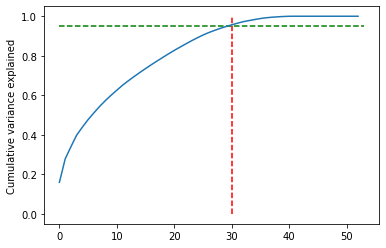

In [49]:
fig = plt.figure(figsize=[6,4])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=len(X_train_scaled.columns), xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### PCA with 30 components

In [50]:
pca_final = IncrementalPCA(n_components=30)
x_train_pca = pca_final.fit_transform(X_train_scaled)
x_test_pca = pca_final.transform(X_test_scaled)

print("Shape of training DataFrame with PCA: ", x_train_pca.shape)
print("Shape of testing DataFrame with PCA: ", x_test_pca.shape)
print("PCA has reduced the dimensionality by ",X_train_scaled.shape[1]-x_train_pca.shape[1],"\n", 
      "However, we are able to explain 95% of the vraince")

Shape of training DataFrame with PCA:  (38584, 30)
Shape of testing DataFrame with PCA:  (16536, 30)
PCA has reduced the dimensionality by  23 
 However, we are able to explain 95% of the vraince


In [51]:
consolidate_summary = pd.DataFrame()

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def display_hyper_stats(cv_results,param_value):
    gamma = cv_results[cv_results['param_gamma']==param_value]
    plt.plot(gamma["param_C"], gamma["mean_test_score"])
    plt.plot(gamma["param_C"], gamma["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(param_value))
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
    plt.xscale('log')  
    
def print_model_metrics(y_test,y_pred,model_name):
    print(model_name," Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),3)
    recall = round(recall_score(y_test,y_pred),3)
    precision = round(precision_score(y_test,y_pred),3)
    auc = round(roc_auc_score(y_test,y_pred),3)
    f1 = round(f1_score(y_test,y_pred),3)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

# Step 7: Data Modeling
### I. Logistic Regression Model

In [52]:
# Fitting Logistic Regression Model
lr = LogisticRegression()
model = lr.fit(x_train_pca,y_train)
logsk_pred_probs_train = model.predict_proba(x_train_pca)[:,1] 
print("Logistic Regression Accurancy on Train Data : ","{:2.2}".format(roc_auc_score(y_train, logsk_pred_probs_train)))

#Making prediction on the test data
logsk_pred_probs_test = model.predict_proba(x_test_pca)[:,1]
print("Logistic Regression Accurancy on Test Data : ","{:2.2}".format(roc_auc_score(y_test, logsk_pred_probs_test)))

Logistic Regression Accurancy on Train Data :  0.85
Logistic Regression Accurancy on Test Data :  0.85


In [53]:
logsk_pred_probs_test[:10]

array([0.05736355, 0.6239478 , 0.79700774, 0.73921656, 0.75719251,
       0.26002728, 0.83652564, 0.76629295, 0.16937518, 0.89690871])

In [54]:
y_train_pred = pd.DataFrame({'Churn':y_train.values, 'log_Churn_Prob':logsk_pred_probs_train})
y_train_pred['log_pred_churn'] = y_train_pred.log_Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

Logistic Regression  Model Stats Scores Summary : 


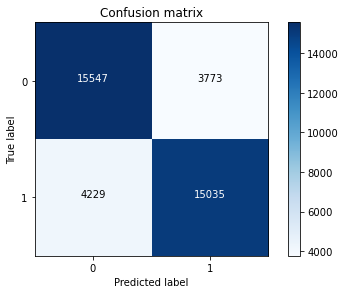

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.793,0.78,0.799,0.793,0.79


In [55]:
print_model_metrics(y_train_pred.Churn,y_train_pred.log_pred_churn,"Logistic Regression")

Logistic Regression  Model Stats Scores Summary : 


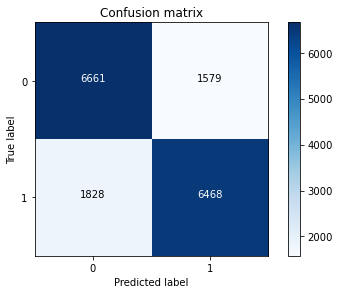

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.794,0.78,0.804,0.794,0.792


In [56]:
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'log_Churn_Prob':logsk_pred_probs_test})
y_test_pred['log_pred_churn'] = y_test_pred.log_Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
print_model_metrics(y_test_pred.Churn,y_test_pred.log_pred_churn,"Logistic Regression")

#### Metric Interpretation: Logistic Regression Model
- ```Accuracy``` is a good start while evaluating the model. However, it is more applicable when every class is more important.
- ```ROC AUC Score``` is also not an appropriate metric due to heavily imbalanced data. Also, This metric care equally about positive and negative classes.
- **```F1 Score```** is a go to metric when we care more about positive class or precision considering the data is imbalanced. In our case we are more concerned about positive prediction. So we will use keep this metric for evaluating the model.



### II. Random Forest Model

In [57]:
def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = pd.DataFrame(rf.cv_results_)
    scores

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [58]:
# Fitting Logistic Regression Model
rfc = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
model = rfc.fit(x_train_pca,y_train)
rfc_pred_probs_train = model.predict(x_train_pca)

#Making prediction on the test data
rfc_pred_probs_test = model.predict(x_test_pca)

Train Data: 

Random Forest (Default)  Model Stats Scores Summary : 


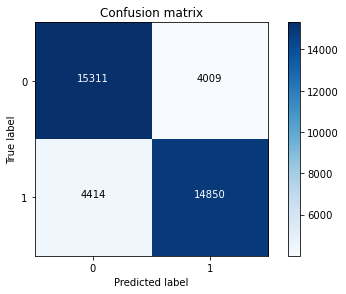

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest (Default),0.782,0.771,0.787,0.782,0.779


In [59]:
print("Train Data:","\n")

print_model_metrics(y_train,rfc_pred_probs_train,"Random Forest (Default)")

Test Data: 

Random Forest (Default)  Model Stats Scores Summary : 


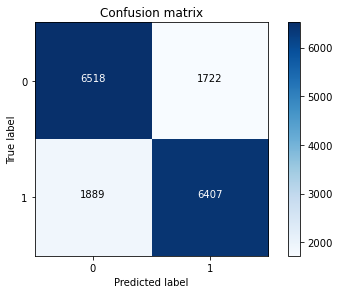

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest (Default),0.782,0.772,0.788,0.782,0.78


In [60]:
print("Test Data:","\n")
print_model_metrics(y_test,rfc_pred_probs_test,"Random Forest (Default)")

#### Grid search for hyper-parameter tuning

In [61]:
classifier_rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {'max_depth': range(2, 40, 5)}

#### NOTE: We couldn't define more parameters than ```max_depth``` as the CPU and memory shoots up & code do not get converged.

In [62]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [63]:
# This program may take 4-5 minutes to run
%time
grid_search.fit(x_train_pca,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 40, 5)}, scoring='f1',
             verbose=1)

In [64]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=27, random_state=42)

In [65]:
scores = pd.DataFrame(grid_search.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.574923,0.163764,0.141287,0.006419,2,{'max_depth': 2},0.774117,0.764767,0.765890,0.773267,0.759205,0.767449,0.005584,8
1,23.792309,0.574461,0.212326,0.029635,7,{'max_depth': 7},0.813049,0.802956,0.813519,0.809037,0.799042,0.807521,0.005684,7
2,36.819035,0.675746,0.289116,0.005143,12,{'max_depth': 12},0.879178,0.869318,0.876055,0.875763,0.866528,0.873368,0.004688,6
3,43.141412,0.511984,0.352612,0.015116,17,{'max_depth': 17},0.920112,0.912557,0.917911,0.916220,0.915293,0.916419,0.002533,5
4,45.710289,0.873999,0.426986,0.051339,22,{'max_depth': 22},0.927129,0.921019,0.922486,0.925571,0.923984,0.924038,0.002165,4
5,48.423594,1.060682,0.431948,0.047744,27,{'max_depth': 27},0.930185,0.921423,0.927655,0.929001,0.925051,0.926663,0.003128,1
6,49.114507,0.579312,0.412531,0.041589,32,{'max_depth': 32},0.927811,0.926248,0.925902,0.927930,0.923768,0.926332,0.001517,2
7,50.204446,0.414979,0.467962,0.036366,37,{'max_depth': 37},0.927711,0.923727,0.926992,0.927994,0.925051,0.926295,0.001644,3


#### Observations: RandomForestClassifier Result
- Given the parameter, Random forest model is able to provide mean_test_score approx. 93% with max_depth of 37
- However, the improvement in model beyond the max_depth of 17 seems insignificant.
- While evaluating the model, the output turned out to be overestimated. (See Below)
- ***Therefore, we decide to go with ```max_depth``` of 17.***

In [66]:
rf_best_pred_probs_train = rf_best.predict(x_train_pca)

Random Forest (Best Estimator)  Model Stats Scores Summary : 


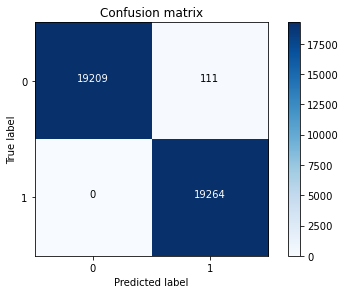

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest (Best Estimator),0.997,1.0,0.994,0.997,0.997


In [67]:
print_model_metrics(y_train,rf_best_pred_probs_train,"Random Forest (Best Estimator)")

#### Training RandomForestClassifier with max_depth=17

In [68]:
# Fitting Logistic Regression Model
rf = RandomForestClassifier(random_state=42, max_depth=17)
model = rf.fit(x_train_pca,y_train)
rf_pred_probs_train = model.predict(x_train_pca)

#Making prediction on the test data
rf_pred_probs_test = model.predict(x_test_pca)

Train Data: 

Random Forest (max_depth=17)  Model Stats Scores Summary : 


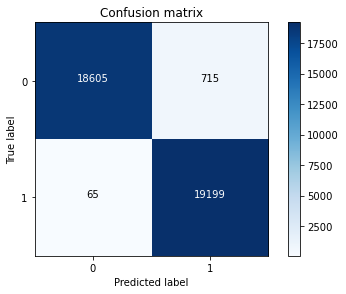

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest (max_depth=17),0.98,0.997,0.964,0.98,0.98


In [69]:
print("Train Data:","\n")

print_model_metrics(y_train,rf_pred_probs_train,"Random Forest (max_depth=17)")

Test Data: 

Random Forest (max_depth=17)  Model Stats Scores Summary : 


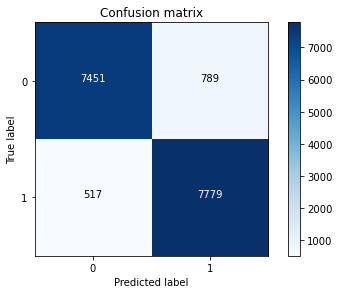

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest (max_depth=17),0.921,0.938,0.908,0.921,0.923


In [70]:
print("Test Data:","\n")
print_model_metrics(y_test,rf_pred_probs_test,"Random Forest (max_depth=17)")

### Model Comparison: ```Logistics Regression vs RandomForestClassifier```
- F1 Score has improved significantly from ```0.8 to 0.92 approx``` in test data.
- Logistic regression was able to achieve this result with ```30 Principal Components```.
- Whereas RandomForest is able to perfrom way better than Logistic Regression model with just half of the ```Principal Components (i.e. 17)```.


### Conclusion:
##### We will proceed with ```RandomForestClassifier``` to identify customers who are more likely to churn.

# Step 8: Improtant Feature Identification and recommend strategies to manage customer churn
- We have already done a lot of background work such as Feature Derivation, feature scaling, imbalance data treatment
- We will directly jump into finding correlation amongst independent variables

### I. Multicollinearity

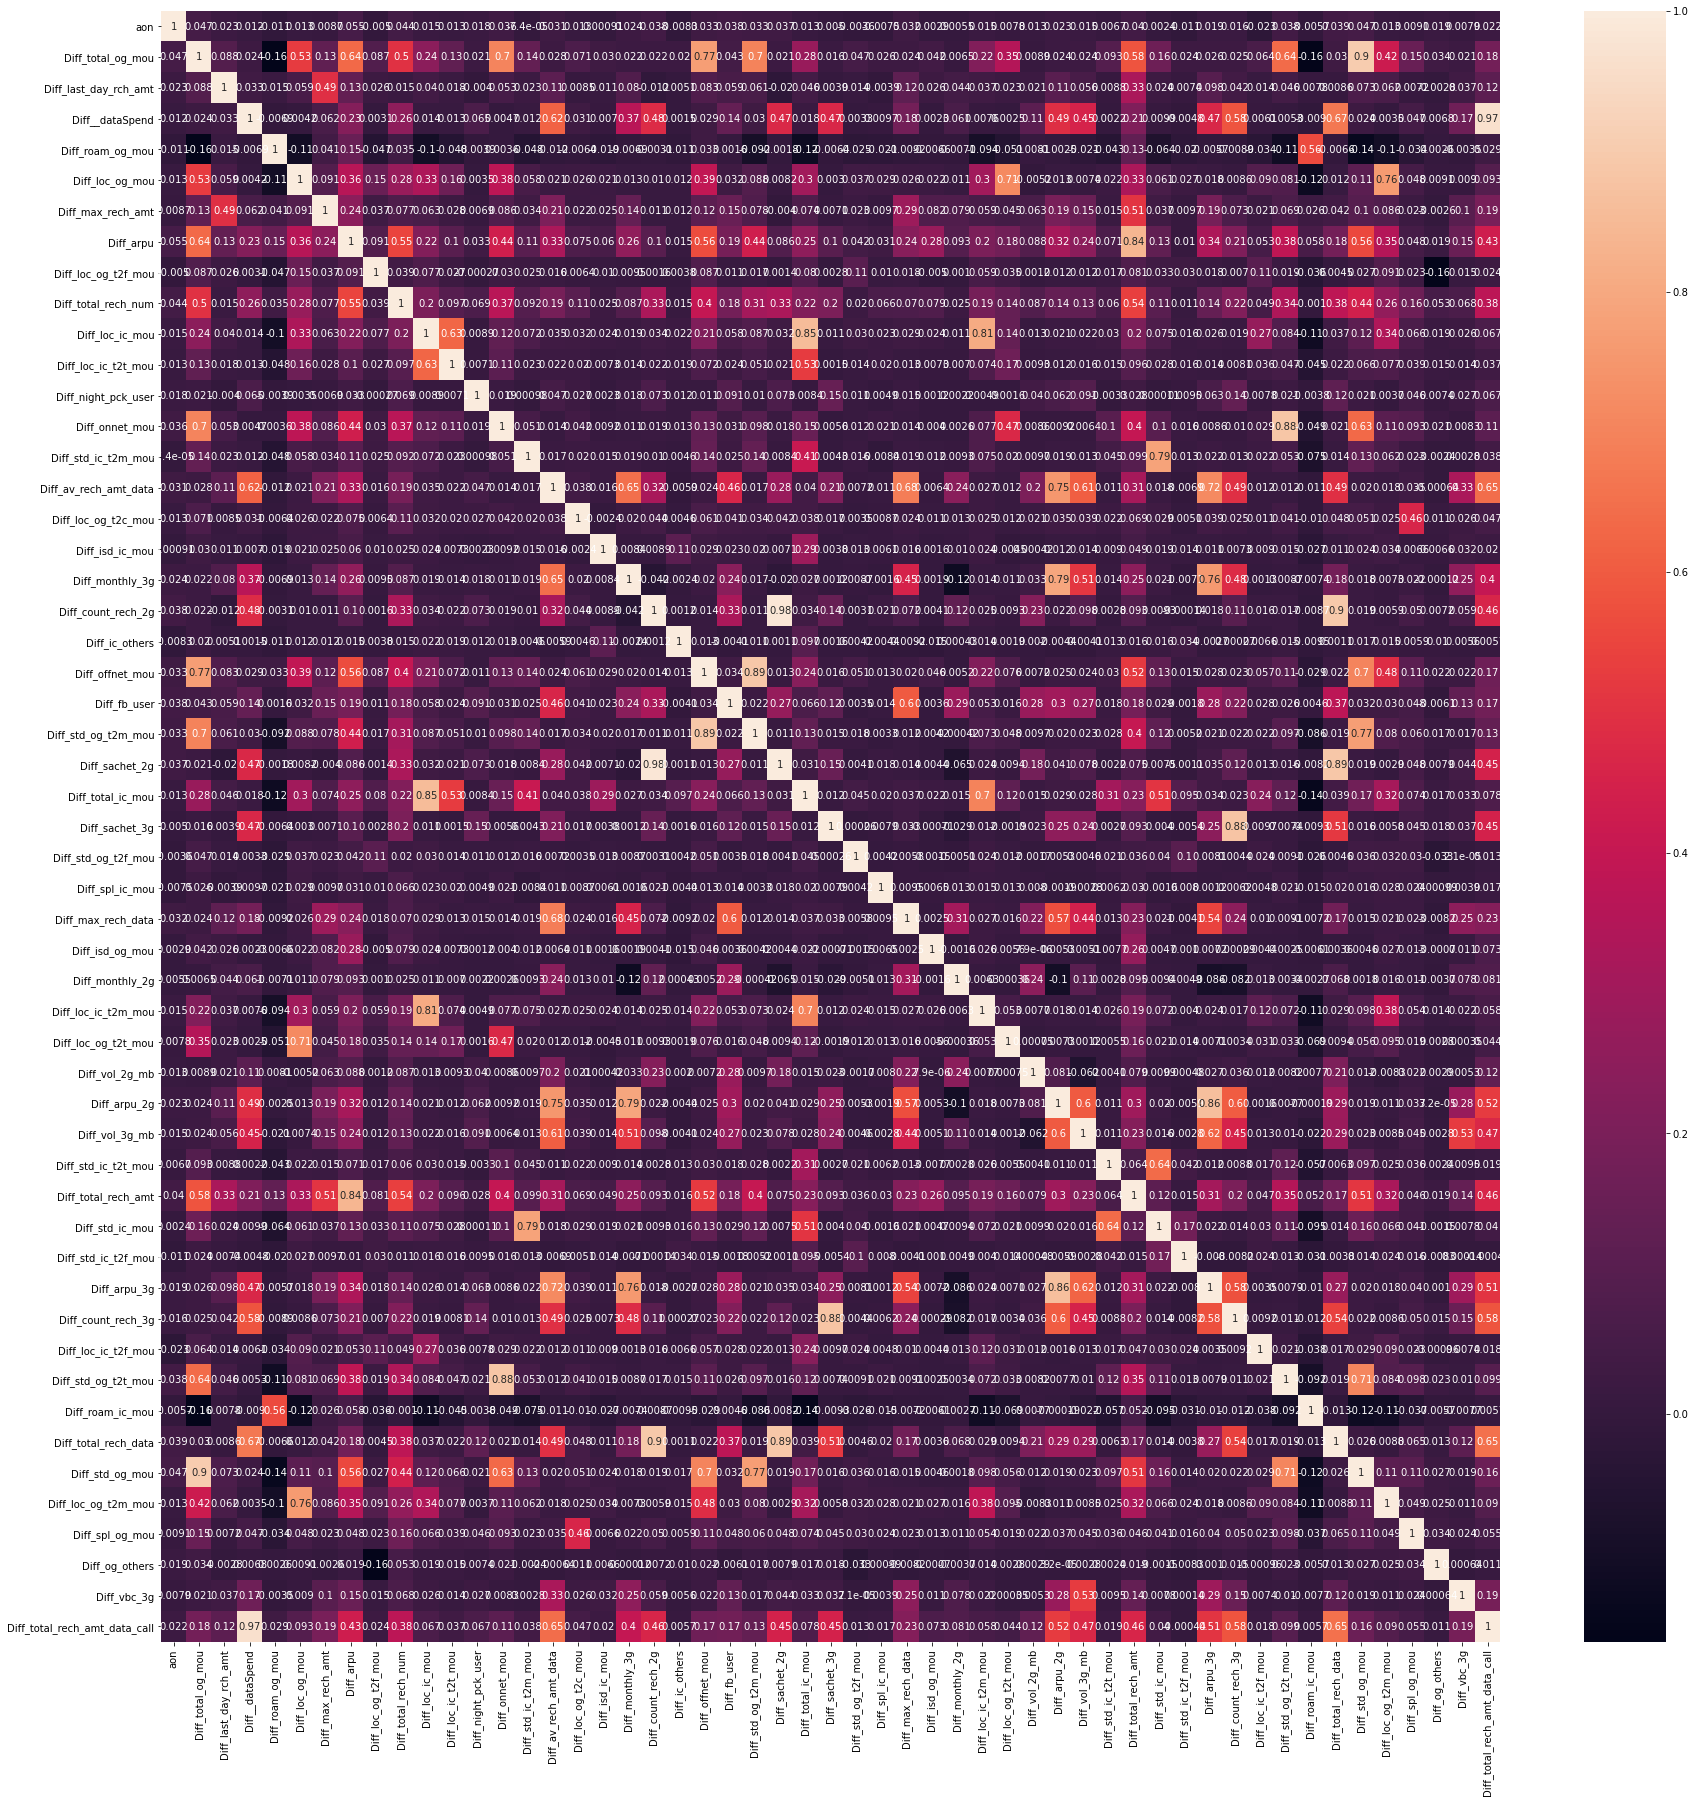

In [71]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(df_v_high[num_col].corr(),annot = True)
plt.show()

In [72]:
cor = df_v_high[num_col].corr()
# Create correlation matrix
corr_matrix = df_v_high[num_col].corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.7
high_collinear_cols = [column for column in upper.columns if any(upper[column] > 0.7)]
high_collinear_cols

['Diff_onnet_mou',
 'Diff_offnet_mou',
 'Diff_std_og_t2m_mou',
 'Diff_sachet_2g',
 'Diff_total_ic_mou',
 'Diff_loc_ic_t2m_mou',
 'Diff_loc_og_t2t_mou',
 'Diff_arpu_2g',
 'Diff_total_rech_amt',
 'Diff_std_ic_mou',
 'Diff_arpu_3g',
 'Diff_count_rech_3g',
 'Diff_std_og_t2t_mou',
 'Diff_total_rech_data',
 'Diff_std_og_mou',
 'Diff_loc_og_t2m_mou',
 'Diff_total_rech_amt_data_call']

### Observations: Multicollinearity
- As we can see, there are variables with high correlation.
- These variables may overestimate the resutl.
- However, we will proceed with them and drop after running the logisitic regression model.

### II. Model Building: Logistic Regression
#### a). Feature Selection using RFE

In [73]:
y_train=y_train.values.reshape(-1,1)

# Fitting Logistic regression model

logreg = LogisticRegression()
rfe = RFE(logreg) # running RFE with all the variables as output
rfe = rfe.fit(X_train_scaled, y_train)

In [74]:
significant_col = X_train_scaled.columns[rfe.support_]
len(significant_col)

26

In [75]:
X_train_scaled_logit= X_train_scaled[significant_col]

#### Model: Version 1.0

In [76]:
# Fitting Logistic regression model
logm1 = stat_mod.GLM(y_train,(stat_mod.add_constant(X_train_scaled_logit)), family = stat_mod.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19255.
Date:                Wed, 29 Sep 2021   Deviance:                       38509.
Time:                        21:12:02   Pearson chi2:                 4.62e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0428      0.013      3.377      0.001       0.018       0.068
aon                              -0.3607      0.013    -27.255      0.000      -0.387      -0.335
Diff_total_og_mou                -0.4963      0.152     -3.259      0.001      -0.795      -0.198
Diff_last_day_rch_amt            -0.2443      0.017    -14.115      0.000      -0.278      -0.210
Diff_max_rech_amt                -0.2319      0.018    -13.106      0.000      -0.267      -0.197
Diff_arpu                        -0.4830      0.031    -15.792      0.000      -0.543      -0.423
Diff_total_rech_num              -0.3747      0.024    -15.704      0.000      -0.421      -0.328
Diff_loc_ic_mou                  -0.5665      0.345     -1.640      0.101      -1.244       0.111
Diff_onnet_mou                    0.2023      0.089      2.269      0.023       0.028       0.377
Diff_std_ic_t2m_mou               0.1339      0.029      4.610      0.000       0.077       0.191
Diff_av_rech_amt_data             0.1993      0.032      6.182      0.000       0.136       0.262
Diff_isd_ic_mou                  -0.1351      0.086     -1.569      0.117      -0.304       0.034
Diff_fb_user                     -0.3351      0.021    -16.187      0.000      -0.376      -0.294
Diff_std_og_t2m_mou               0.1255      0.095      1.327      0.185      -0.060       0.311
Diff_sachet_2g                   -0.4298      0.089     -4.808      0.000      -0.605      -0.255
Diff_total_ic_mou                 0.3797      0.413      0.920      0.357      -0.429       1.188
Diff_spl_ic_mou                  -0.1197      0.015     -7.865      0.000      -0.150      -0.090
Diff_max_rech_data               -0.1412      0.026     -5.351      0.000      -0.193      -0.089
Diff_loc_ic_t2m_mou              -0.1802      0.033     -5.469      0.000      -0.245      -0.116
Diff_std_ic_mou                  -0.4120      0.169     -2.443      0.015      -0.743      -0.081
Diff_count_rech_3g               -0.2644      0.043     -6.145      0.000      -0.349      -0.180
Diff_total_rech_data              0.1356      0.111      1.221      0.222      -0.082       0.353
Diff_std_og_mou                  -0.2788      0.065     -4.263      0.000      -0.407      -0.151
Diff_loc_og_t2m_mou               0.1226      0.043      2.825      0.005       0.038       0.208
Diff_og_others                    0.1277      0.028      4.568      0.000       0.073       0.183
Diff_vbc_3g                      -0.0969      0.014     -6.699      0.000      -0.125      -0.069
Diff_total_rech_amt_data_call     0.1765      0.034      5.202      0.000       0.110       0.243
=================================================================================================
"""

In [77]:
fit_1= logm1.fit()
insignificant_var = fit_1.params.index[fit_1.pvalues>=0.05].to_list()
print("Number of Insignificant variables: ",len(insignificant_var))
insignificant_var

Number of Insignificant variables:  5


['Diff_loc_ic_mou',
 'Diff_isd_ic_mou',
 'Diff_std_og_t2m_mou',
 'Diff_total_ic_mou',
 'Diff_total_rech_data']

In [78]:
X_train_scaled_logit_1= X_train_scaled_logit.drop(insignificant_var,axis=1)

#### Model: Version 1.1

In [79]:
# Fitting Logistic regression model
logm2 = stat_mod.GLM(y_train,(stat_mod.add_constant(X_train_scaled_logit_1)), family = stat_mod.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19298.
Date:                Wed, 29 Sep 2021   Deviance:                       38596.
Time:                        21:12:05   Pearson chi2:                 4.06e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0405      0.013      3.203      0.001       0.016       0.065
aon                              -0.3577      0.013    -27.105      0.000      -0.384      -0.332
Diff_total_og_mou                -0.4189      0.080     -5.227      0.000      -0.576      -0.262
Diff_last_day_rch_amt            -0.2453      0.017    -14.188      0.000      -0.279      -0.211
Diff_max_rech_amt                -0.2351      0.018    -13.336      0.000      -0.270      -0.201
Diff_arpu                        -0.4827      0.030    -16.347      0.000      -0.541      -0.425
Diff_total_rech_num              -0.3751      0.024    -15.752      0.000      -0.422      -0.328
Diff_onnet_mou                    0.0925      0.028      3.320      0.001       0.038       0.147
Diff_std_ic_t2m_mou               0.1382      0.029      4.718      0.000       0.081       0.196
Diff_av_rech_amt_data             0.2018      0.032      6.332      0.000       0.139       0.264
Diff_fb_user                     -0.3330      0.020    -16.742      0.000      -0.372      -0.294
Diff_sachet_2g                   -0.3252      0.021    -15.629      0.000      -0.366      -0.284
Diff_spl_ic_mou                  -0.1223      0.015     -8.076      0.000      -0.152      -0.093
Diff_max_rech_data               -0.1383      0.026     -5.264      0.000      -0.190      -0.087
Diff_loc_ic_t2m_mou              -0.3832      0.022    -17.590      0.000      -0.426      -0.341
Diff_std_ic_mou                  -0.2716      0.033     -8.321      0.000      -0.336      -0.208
Diff_count_rech_3g               -0.2188      0.023     -9.662      0.000      -0.263      -0.174
Diff_std_og_mou                  -0.1900      0.065     -2.910      0.004      -0.318      -0.062
Diff_loc_og_t2m_mou               0.0970      0.027      3.587      0.000       0.044       0.150
Diff_og_others                    0.1240      0.028      4.456      0.000       0.069       0.179
Diff_vbc_3g                      -0.1000      0.014     -6.921      0.000      -0.128      -0.072
Diff_total_rech_amt_data_call     0.1866      0.033      5.655      0.000       0.122       0.251
=================================================================================================
"""

#### b). Checking VIFs

In [80]:
# Check for the VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_scaled_logit_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled_logit_1.values, i) for i in range(X_train_scaled_logit_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Diff_total_og_mou,30.28
16,Diff_std_og_mou,21.30
8,Diff_av_rech_amt_data,4.96
12,Diff_max_rech_data,3.83
20,Diff_total_rech_amt_data_call,3.77
17,Diff_loc_og_t2m_mou,3.42
4,Diff_arpu,3.28
14,Diff_std_ic_mou,2.59
7,Diff_std_ic_t2m_mou,2.57
6,Diff_onnet_mou,2.38


- We will keep features having VIF value less than or equal to 5.
- VIF value for the features ```Diff_total_og_mou and Diff_std_og_mou``` is very high.
- We will drop these features and create a new dataframe.

In [81]:
X_train_scaled_logit_2 = X_train_scaled_logit_1.drop(list(vif.Features[vif.VIF>5]),axis=1)
X_train_scaled_logit_2.shape

(38584, 19)

#### Model: Version 2.0

In [82]:
# Fitting Logistic regression model
logm3 = stat_mod.GLM(y_train,(stat_mod.add_constant(X_train_scaled_logit_2)), family = stat_mod.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38564
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19479.
Date:                Wed, 29 Sep 2021   Deviance:                       38959.
Time:                        21:12:16   Pearson chi2:                 6.34e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0316      0.013      2.518      0.012       0.007       0.056
aon                              -0.3747      0.013    -28.419      0.000      -0.401      -0.349
Diff_last_day_rch_amt            -0.2604      0.017    -14.990      0.000      -0.294      -0.226
Diff_max_rech_amt                -0.2091      0.018    -11.768      0.000      -0.244      -0.174
Diff_arpu                        -0.6775      0.029    -23.521      0.000      -0.734      -0.621
Diff_total_rech_num              -0.4440      0.024    -18.787      0.000      -0.490      -0.398
Diff_onnet_mou                   -0.1790      0.020     -8.931      0.000      -0.218      -0.140
Diff_std_ic_t2m_mou               0.1060      0.030      3.591      0.000       0.048       0.164
Diff_av_rech_amt_data             0.2564      0.033      7.858      0.000       0.192       0.320
Diff_fb_user                     -0.3222      0.020    -16.193      0.000      -0.361      -0.283
Diff_sachet_2g                   -0.2977      0.021    -14.351      0.000      -0.338      -0.257
Diff_spl_ic_mou                  -0.1181      0.015     -7.902      0.000      -0.147      -0.089
Diff_max_rech_data               -0.1451      0.027     -5.450      0.000      -0.197      -0.093
Diff_loc_ic_t2m_mou              -0.4013      0.022    -18.105      0.000      -0.445      -0.358
Diff_std_ic_mou                  -0.2771      0.033     -8.428      0.000      -0.342      -0.213
Diff_count_rech_3g               -0.1899      0.023     -8.413      0.000      -0.234      -0.146
Diff_loc_og_t2m_mou               0.0450      0.018      2.506      0.012       0.010       0.080
Diff_og_others                    0.1146      0.027      4.219      0.000       0.061       0.168
Diff_vbc_3g                      -0.0945      0.014     -6.527      0.000      -0.123      -0.066
Diff_total_rech_amt_data_call     0.1585      0.034      4.599      0.000       0.091       0.226
=================================================================================================
"""

#### c). Checking VIFs: Model Version 2.0

In [83]:
# Check for the VIF values of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_scaled_logit_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled_logit_2.values, i) for i in range(X_train_scaled_logit_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Diff_av_rech_amt_data,4.92
11,Diff_max_rech_data,3.83
18,Diff_total_rech_amt_data_call,3.77
3,Diff_arpu,2.83
13,Diff_std_ic_mou,2.59
6,Diff_std_ic_t2m_mou,2.55
8,Diff_fb_user,2.25
4,Diff_total_rech_num,2.07
9,Diff_sachet_2g,2.03
14,Diff_count_rech_3g,1.91


In [84]:
fit_2=logm3.fit()

In [85]:
# Significant Featrures List
Sig_feature_df = pd.DataFrame(fit_2.params, columns=['coef']).reset_index()
Sig_feature_df['coef_sq']=Sig_feature_df['coef'].apply(lambda x: x*-1 if x<0 else x)
Sig_feature_df.sort_values(by='coef_sq', ascending=False)

,index,coef,coef_sq
4,Diff_arpu,-0.677451,0.677451
5,Diff_total_rech_num,-0.443955,0.443955
13,Diff_loc_ic_t2m_mou,-0.401256,0.401256
1,aon,-0.374712,0.374712
9,Diff_fb_user,-0.322185,0.322185
10,Diff_sachet_2g,-0.297681,0.297681
14,Diff_std_ic_mou,-0.277130,0.277130
2,Diff_last_day_rch_amt,-0.260442,0.260442
8,Diff_av_rech_amt_data,0.256401,0.256401
3,Diff_max_rech_amt,-0.209066,0.209066


### Above is the final list of variables which came out to be significant for predicting customer churn.
#### ```Recommended Strategies``` and Significant Variable Interpretation

#### I. Features Which are ```Negatively``` Related with Churn
- Highly recommended to keep up their value from the average of 6th and 7th month
- As 1 unit increase will decrease the odds of churning the customers.

In [86]:
Sig_feature_df[Sig_feature_df['coef']<0]['index']

1                       aon
2     Diff_last_day_rch_amt
3         Diff_max_rech_amt
4                 Diff_arpu
5       Diff_total_rech_num
6            Diff_onnet_mou
9              Diff_fb_user
10           Diff_sachet_2g
11          Diff_spl_ic_mou
12       Diff_max_rech_data
13      Diff_loc_ic_t2m_mou
14          Diff_std_ic_mou
15       Diff_count_rech_3g
18              Diff_vbc_3g
Name: index, dtype: object

#### II. Features Which are ```Positively``` Related with Churn
- Highly recommended to keep down their value from the average of 6th and 7th month
- As 1 unit decrease will decrease the odds of churning the customers.

In [87]:
Sig_feature_df[Sig_feature_df['coef']>0]['index']

0                             const
7               Diff_std_ic_t2m_mou
8             Diff_av_rech_amt_data
16              Diff_loc_og_t2m_mou
17                   Diff_og_others
19    Diff_total_rech_amt_data_call
Name: index, dtype: object

#### III. Variable Interpretation
- ```Intercept``` or ```const``` being positively related with churn suggests that customer will churn if probability of churn remain unaffected by other factors. In other words, Customer will churn if we set the value of all the factors **0** except ```const```.
- ```ARPU``` being the most important factor behind churn is indirectly dependent on other factors such as recharge amount, minutes usage, internet usage, etc. Hence, formulating a strategy for recharge vouchers and data plan can increase the ARPU significantly. Consequently, the odds for churning the customer will decrease.
- Next important factors' are either incoming calls or outgoing calls to other operator mobile and Fixed Line. Amongst the list of significant variables, we have 6 variables ```(Diff_og_others, Diff_loc_og_t2m_mou, Diff_std_ic_t2m_mou, Diff_loc_ic_t2m_mou, Diff_std_ic_mou, Diff_spl_ic_mou)``` which influence customer to churn either positively or negatively w. However, factor which influence the customer to churn usage to make calls to either other operator mobile or fixed line.
- Consquently, ```Diff_total_rech_amt_data_call``` increases and influence customer to churn.
- Also, we have observed that increasing usage of facebook or similar social media sites decrease the odds of churn. At the same time increase in recharge amount ```Diff_av_rech_amt_data``` increase the odds of churn. Hence, Operator **'t'** should work on reducing data plan.
- ```Age on Network```, suggest older the customer in network lesser the chances of being churn.

#### IV. Recommended Strategy
- Operator ```t``` should introduce new recharges with denomination lesser than the previous one for outgoing calls to fixed line and other operator mobile.
- Operator ```t``` Should have a Combo Plan for both data and call with a denomination little higher than the total of both the recharges seperatly.
- Operator ```t``` should promote Volume based cost as it can be seen that its usage decrease the churn.
- Operator ```t``` Should try upselling monthly data recharge plans to customers whose internet usage is high but keep buying sachet_2g.
- Operator ```t``` Should divert their resources on engaging customers who are relatively new as the churn is very high in customers who haven't completed an year. Also, it is one of the important variable suggested by Logisitic Regression model. ```(please see the calculation below)```

In [88]:
df_v_high['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [89]:
def categorigeNetWorkAge(temp):
    year = int(temp/365)
    if(year <=1): 
        return "less than year"
    elif(1<year<=3): 
        return "1- 3 years"
    elif(3<year<=5): 
        return "3-5 years"
    elif(5<year<=7): 
        return "5 - 7 years"
    elif(7<year<=9): 
        return "7-9 years"
    else:
        return "9+ years"

In [90]:
df_v_high_1= df_v_high.copy()

In [91]:
df_v_high_1['category_NetworkAge']=df_v_high.apply(lambda x: categorigeNetWorkAge(x.aon),axis=1)

In [92]:
df_v_high_1.head()

,aon,churn,Diff_total_og_mou,Diff_last_day_rch_amt,Diff__dataSpend,Diff_roam_og_mou,Diff_loc_og_mou,Diff_max_rech_amt,Diff_arpu,Diff_loc_og_t2f_mou,Diff_total_rech_num,Diff_loc_ic_mou,Diff_loc_ic_t2t_mou,Diff_night_pck_user,Diff_onnet_mou,Diff_std_ic_t2m_mou,Diff_av_rech_amt_data,Diff_loc_og_t2c_mou,Diff_isd_ic_mou,Diff_monthly_3g,Diff_count_rech_2g,Diff_ic_others,Diff_offnet_mou,Diff_fb_user,Diff_std_og_t2m_mou,Diff_sachet_2g,Diff_total_ic_mou,Diff_sachet_3g,Diff_std_og_t2f_mou,Diff_spl_ic_mou,Diff_max_rech_data,Diff_isd_og_mou,Diff_monthly_2g,Diff_loc_ic_t2m_mou,Diff_loc_og_t2t_mou,Diff_vol_2g_mb,Diff_arpu_2g,Diff_vol_3g_mb,Diff_std_ic_t2t_mou,Diff_total_rech_amt,Diff_std_ic_mou,Diff_std_ic_t2f_mou,Diff_arpu_3g,Diff_count_rech_3g,Diff_loc_ic_t2f_mou,Diff_std_og_t2t_mou,Diff_roam_ic_mou,Diff_total_rech_data,Diff_std_og_mou,Diff_loc_og_t2m_mou,Diff_spl_og_mou,Diff_og_others,Diff_vbc_3g,Diff_total_rech_amt_data_call,category_NetworkAge
0,968,1,0.000,0.0,0.0,0.000,0.000,0.0,7.7025,0.000,-1.5,5.440,0.160,0.0,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,5.440,0.0,0.00,0.000,0.0,0.000,0.0,4.130,0.000,-9.975,0.00,-7.555,0.000,-55.0,0.000,0.000,0.000,0.0,1.150,0.000,0.00,0.0,0.000,0.000,0.00,0.0,-20.200,-55.0,1- 3 years
7,802,1,-198.225,779.0,0.0,19.895,-222.245,395.0,1961.9650,-5.405,2.0,-203.515,-17.890,0.0,-3.97,32.115,0.0,0.00,23.295,0.0,0.0,-0.325,-184.385,0.0,8.315,0.0,-163.510,0.0,3.31,-0.105,0.0,9.920,0.0,-98.335,-1.105,0.000,0.00,0.000,6.030,2453.0,17.130,-21.005,0.000,0.0,-87.280,-1.785,6.78,0.0,9.840,-215.725,4.25,0.0,38.680,2453.0,1- 3 years
8,315,0,-298.450,-15.0,30.0,0.000,-270.095,-92.0,-298.1100,0.000,-6.0,-36.840,-16.530,0.0,-347.28,-12.605,-19.5,7.15,0.000,0.0,2.0,0.000,48.835,0.5,63.825,2.5,-49.635,0.0,0.00,0.000,-54.0,0.000,-0.5,-20.300,-244.870,-177.970,0.00,-363.535,-0.190,-399.0,-12.795,0.000,19.830,0.0,0.000,-102.415,0.00,2.0,-38.590,-25.230,10.23,0.0,-495.375,-369.0,less than year
21,720,0,123.975,25.0,0.0,0.000,34.175,0.0,81.6570,1.205,3.0,52.605,13.205,0.0,-32.12,48.780,0.0,0.00,0.000,0.0,0.0,0.000,156.085,0.0,139.940,0.0,91.550,0.0,0.00,0.000,0.0,0.000,0.0,32.730,18.020,0.000,0.00,0.000,-9.840,78.0,38.945,0.000,0.000,0.0,6.665,-50.145,0.00,0.0,89.800,14.940,0.00,0.0,0.000,78.0,less than year
23,604,0,102.270,-89.5,184.0,0.000,49.345,89.5,232.8425,0.000,0.0,78.690,35.765,0.0,-16.23,35.250,92.0,17.71,-10.375,0.0,0.0,10.385,118.505,0.5,35.255,0.0,127.095,1.0,0.00,0.000,89.5,-0.005,0.0,42.205,-16.230,-0.230,-0.22,710.375,13.125,212.0,48.375,0.000,43.985,1.0,0.710,0.000,0.00,1.0,35.255,65.585,17.66,0.0,14.520,396.0,less than year


In [93]:
grp=pd.DataFrame(df_v_high_1.groupby('category_NetworkAge')['churn'].value_counts(1))
grp.rename(columns={'churn':'default_perc'}, inplace=True)
grp.reset_index(inplace=True)
grp=grp[grp.churn==1]
grp=grp.reset_index(drop=True)
grp['default_perc']= round(grp.default_perc*100,2)
grp.sort_values(by='default_perc', ascending=False)

,category_NetworkAge,churn,default_perc
5,less than year,1,10.87
0,1- 3 years,1,8.25
1,3-5 years,1,5.06
2,5 - 7 years,1,3.70
3,7-9 years,1,3.60
4,9+ years,1,2.46
